CHURN

Churn rate (sometimes called attrition rate), in its broadest sense, is a measure of the number of individuals or items moving out of a collective group over a specific period. It is one of two primary factors that determine the steady-state level of customers a business will support.

Derived from the butter churn, the term is used in many contexts but most widely applied in business with respect to a contractual customer base. Examples include a subscriber-based service model as used by mobile telephone networks and pay TV operators. The term is often synonymous with turnover, for example participant turnover in peer-to-peer networks. Churn rate is an input into customer lifetime value modeling, and can be part of a simulator used to measure return on marketing investment using marketing mix modeling.

DATA DESCRIPTION

Problem Statement: Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.

Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models. Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base.

Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching services are so low.

You will examine customer data from IBM Sample Data Sets with the aim of building and comparing several customer churn prediction models.

Loading the Data Set


In [1]:
import pandas as pd
import numpy as np

df=pd.read_csv('customerchurn.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [2]:
df.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [3]:
df.tail().T


,7038,7039,7040,7041,7042
customerID,6840-RESVB,2234-XADUH,4801-JZAZL,8361-LTMKD,3186-AJIEK
gender,Male,Female,Female,Male,Male
SeniorCitizen,0,0,0,1,0
Partner,Yes,Yes,Yes,Yes,No
Dependents,Yes,Yes,Yes,No,No
tenure,24,72,11,4,66
PhoneService,Yes,Yes,No,Yes,Yes
MultipleLines,Yes,Yes,No phone service,Yes,No
InternetService,DSL,Fiber optic,DSL,Fiber optic,Fiber optic
OnlineSecurity,Yes,No,Yes,No,Yes


In [4]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [5]:
#Data Exploration
cat_cols=df.select_dtypes([object])

for col in cat_cols.columns:
    print(col)
    print(df[col].value_counts())
    print('--------------------------------------------------------------------------')

customerID
7590-VHVEG    1
3791-LGQCY    1
6008-NAIXK    1
5956-YHHRX    1
5365-LLFYV    1
             ..
9796-MVYXX    1
2637-FKFSY    1
1552-AAGRX    1
4304-TSPVK    1
3186-AJIEK    1
Name: customerID, Length: 7043, dtype: int64
--------------------------------------------------------------------------
gender
Male      3555
Female    3488
Name: gender, dtype: int64
--------------------------------------------------------------------------
Partner
No     3641
Yes    3402
Name: Partner, dtype: int64
--------------------------------------------------------------------------
Dependents
No     4933
Yes    2110
Name: Dependents, dtype: int64
--------------------------------------------------------------------------
PhoneService
Yes    6361
No      682
Name: PhoneService, dtype: int64
--------------------------------------------------------------------------
MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64
----------

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
df.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [8]:
df['MonthlyCharges'].value_counts()

20.05     61
19.85     45
19.95     44
19.90     44
20.00     43
          ..
23.65      1
114.70     1
43.65      1
87.80      1
78.70      1
Name: MonthlyCharges, Length: 1585, dtype: int64

In [9]:
df['MonthlyCharges'] = pd.cut(df['MonthlyCharges'], bins = [0, 25, 50, 100,150], labels = ['Low', 'Average', 'High','Very High'])

In [10]:
df['MonthlyCharges'].value_counts()

High         3842
Low          1406
Very High     902
Average       893
Name: MonthlyCharges, dtype: int64

In [11]:
#The above df.info shows the "TotalCharges" columnn as an object, we'll need to convert it to numeric
totalCharges = df.columns.get_loc("TotalCharges")
new_col = pd.to_numeric(df.iloc[:, totalCharges], errors='coerce')
df.iloc[:, totalCharges] = pd.Series(new_col)
df['TotalCharges'].value_counts()

20.20      11
19.75       9
20.05       8
19.90       8
19.65       8
           ..
6849.40     1
692.35      1
130.15      1
3211.90     1
6844.50     1
Name: TotalCharges, Length: 6530, dtype: int64

In [12]:
df['TotalCharges'] = pd.cut(df['TotalCharges'], bins = [0, 100, 500, 1000,10000], labels = ['Low', 'Average', 'High','Very High'])
df['TotalCharges'].value_counts()

Very High    4139
Average      1187
High          893
Low           813
Name: TotalCharges, dtype: int64

In [13]:
df['tenure'].value_counts()

1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64

In [14]:
df['tenure'] = pd.cut(df['tenure'], bins = [0, 25, 50, 100], labels = ['Low', 'Average', 'High'])
df['tenure'].value_counts()

Low        3278
High       2105
Average    1649
Name: tenure, dtype: int64

In [15]:
df.describe(include=['O'])

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,7590-VHVEG,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,5174


In [16]:
# Dropping the irrelevant columns..

df.drop(columns=["customerID"], axis=1, inplace=True)

In [17]:
#Checking for the Columns containing Null , Blank Or Empty Values
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure              11
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [18]:
df.dtypes

gender                object
SeniorCitizen          int64
Partner               object
Dependents            object
tenure              category
PhoneService          object
MultipleLines         object
InternetService       object
OnlineSecurity        object
OnlineBackup          object
DeviceProtection      object
TechSupport           object
StreamingTV           object
StreamingMovies       object
Contract              object
PaperlessBilling      object
PaymentMethod         object
MonthlyCharges      category
TotalCharges        category
Churn                 object
dtype: object

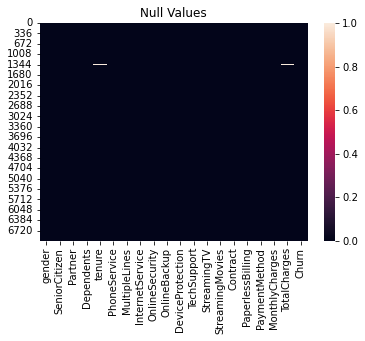

In [19]:
#Checking through Heat Map
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df.isnull())
plt.title("Null Values")
plt.show()

In [24]:
#Checking and Transforming the Data types of the Columns To Same DataTypes for Better Analysis
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   gender            7043 non-null   object  
 1   SeniorCitizen     7043 non-null   int64   
 2   Partner           7043 non-null   object  
 3   Dependents        7043 non-null   object  
 4   tenure            7032 non-null   category
 5   PhoneService      7043 non-null   object  
 6   MultipleLines     7043 non-null   object  
 7   InternetService   7043 non-null   object  
 8   OnlineSecurity    7043 non-null   object  
 9   OnlineBackup      7043 non-null   object  
 10  DeviceProtection  7043 non-null   object  
 11  TechSupport       7043 non-null   object  
 12  StreamingTV       7043 non-null   object  
 13  StreamingMovies   7043 non-null   object  
 14  Contract          7043 non-null   object  
 15  PaperlessBilling  7043 non-null   object  
 16  PaymentMethod     7043 n

In [25]:
df.describe(include=['O'])

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,5174


In [26]:
from sklearn.preprocessing import LabelEncoder
le =LabelEncoder()

list1=['gender','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod','Churn','MonthlyCharges','TotalCharges','tenure']
for val in list1:
  df[val]=le.fit_transform(df[val].astype(str))

In [27]:
df.head().T

,0,1,2,3,4
gender,0,1,1,1,0
SeniorCitizen,0,0,0,0,0
Partner,1,0,0,0,0
Dependents,0,0,0,0,0
tenure,2,0,2,0,2
PhoneService,0,1,1,0,1
MultipleLines,1,0,0,1,0
InternetService,0,0,0,0,1
OnlineSecurity,0,2,2,2,0
OnlineBackup,2,0,2,0,0


C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='PaymentMethod', ylabel='count'>

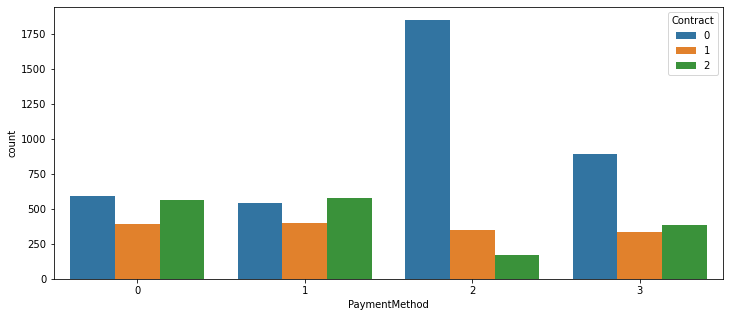

In [28]:
#Exploratory Data Analysis
fig, ax = plt.subplots(figsize = (12,5))
sns.countplot(df.PaymentMethod, hue = df.Contract, ax = ax)

People having month-to-month contract prefer paying by Electronic Check mostly or mailed check. The reason might be short subscription cancellation process compared to automatic payment.

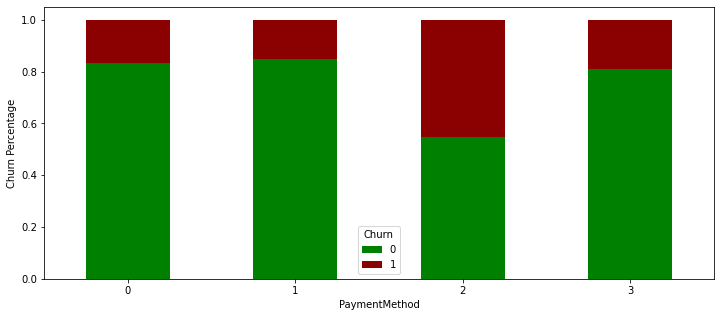

In [29]:
group = "PaymentMethod"
target = "Churn"
fig, ax = plt.subplots(figsize = (12,5))
temp_df = (df.groupby([group, target]).size()/df.groupby(group)[target].count()).reset_index().pivot(columns=target, index=group, values=0)
temp_df.plot(kind='bar', stacked=True, ax = ax, color = ["green", "darkred"])
ax.xaxis.set_tick_params(rotation=0)
ax.set_xlabel(group)
ax.set_ylabel('Churn Percentage');

In the case of Electronic check, churn is very high



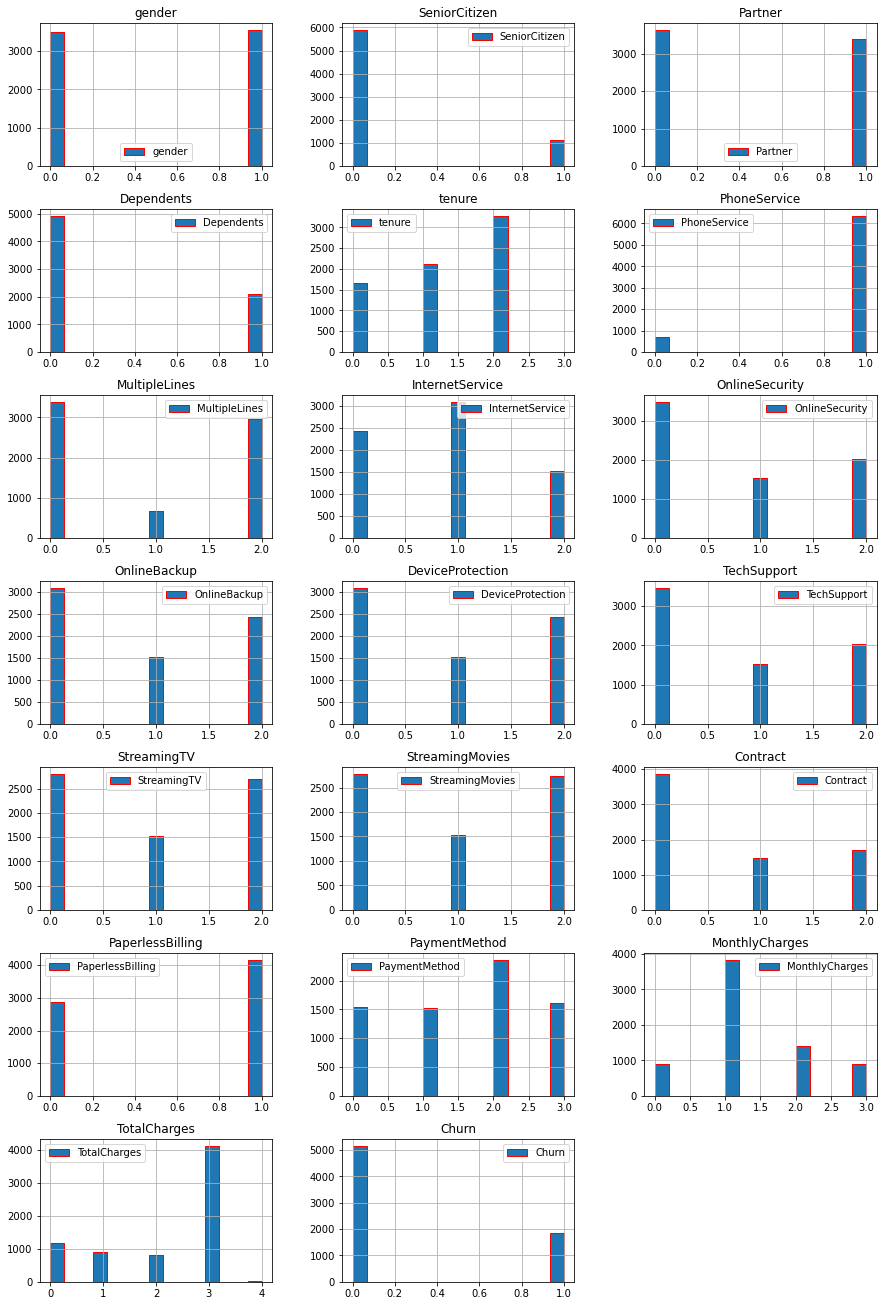

In [35]:
df.hist(figsize=(15,30),edgecolor='red',layout=(9,3),bins=15,legend=True)
plt.show()

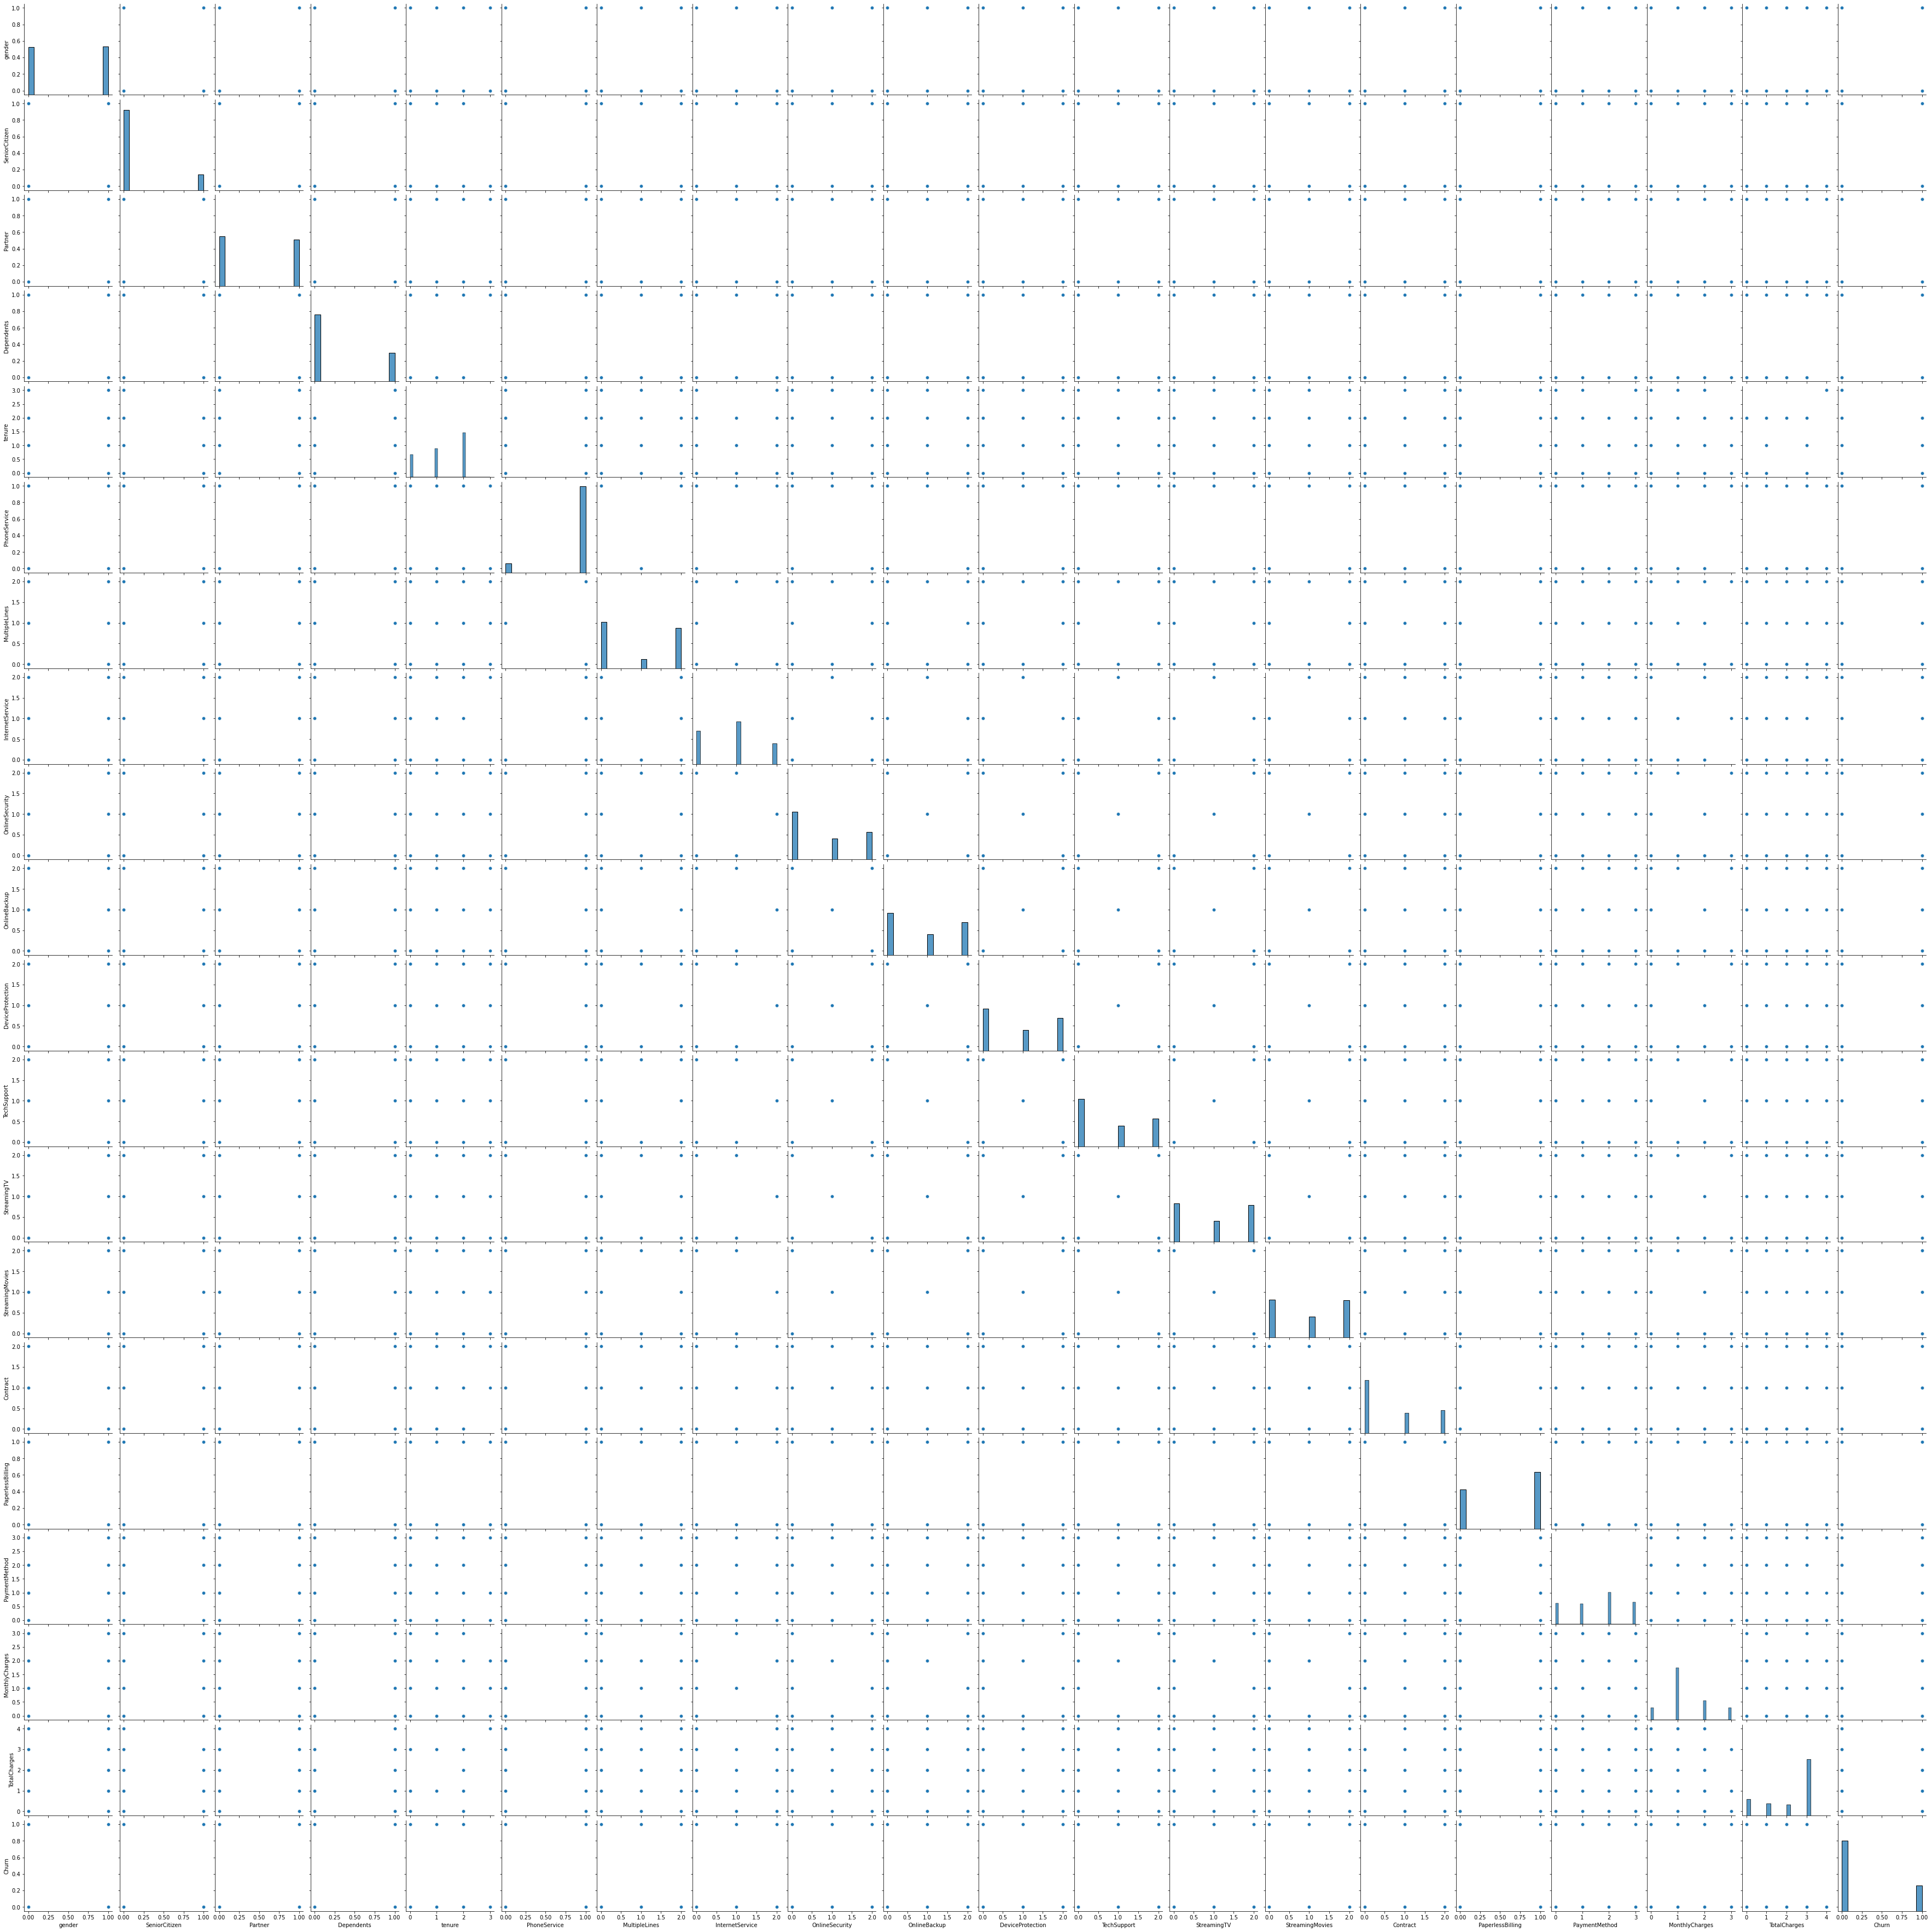

In [38]:
sns.pairplot(df)

In [39]:
#Corealtion between features and target ' CHURN ' ( EDA )
df.corr()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,-0.001874,-0.001808,0.010517,0.005156,-0.006488,-0.006739,-0.000863,-0.015017,-0.012057,0.000549,-0.006825,-0.006421,-0.008743,0.000126,-0.011754,0.017352,-0.009477,0.015418,-0.008612
SeniorCitizen,-0.001874,1.000000,0.016479,-0.211185,-0.030896,0.008576,0.146185,-0.032310,-0.128221,-0.013632,-0.021398,-0.151268,0.030776,0.047266,-0.142554,0.156530,-0.038551,0.013209,0.083670,0.150889
Partner,-0.001808,0.016479,1.000000,0.452676,-0.216066,0.017706,0.142410,0.000891,0.150828,0.153130,0.166330,0.126733,0.137341,0.129574,0.294806,-0.014877,-0.154798,0.097344,0.230164,-0.150448
Dependents,0.010517,-0.211185,0.452676,1.000000,-0.093600,-0.001762,-0.024991,0.044590,0.152166,0.091015,0.080537,0.133524,0.046885,0.021321,0.243187,-0.111377,-0.040292,0.038026,0.048088,-0.164221
tenure,0.005156,-0.030896,-0.216066,-0.093600,1.000000,0.007661,-0.205923,0.025479,-0.163818,-0.205674,-0.217869,-0.175694,-0.169216,-0.173916,-0.335435,-0.000986,0.228026,-0.135730,-0.517188,0.234727
PhoneService,-0.006488,0.008576,0.017706,-0.001762,0.007661,1.000000,-0.020538,0.387436,-0.015198,0.024105,0.003727,-0.019158,0.055353,0.043870,0.002247,0.016505,-0.004184,0.356914,0.028037,0.011942
MultipleLines,-0.006739,0.146185,0.142410,-0.024991,-0.205923,-0.020538,1.000000,-0.109216,0.007141,0.117327,0.122318,0.011466,0.175059,0.180957,0.110842,0.165146,-0.176793,0.092801,0.320910,0.038037
InternetService,-0.000863,-0.032310,0.000891,0.044590,0.025479,0.387436,-0.109216,1.000000,-0.028416,0.036138,0.044944,-0.026047,0.107417,0.098350,0.099721,-0.138625,0.086140,0.493021,-0.174296,-0.047291
OnlineSecurity,-0.015017,-0.128221,0.150828,0.152166,-0.163818,-0.015198,0.007141,-0.028416,1.000000,0.185126,0.175985,0.285028,0.044669,0.055954,0.374416,-0.157641,-0.096726,0.132849,0.156636,-0.289309
OnlineBackup,-0.012057,-0.013632,0.153130,0.091015,-0.205674,0.024105,0.117327,0.036138,0.185126,1.000000,0.187757,0.195748,0.147186,0.136722,0.280980,-0.013370,-0.124847,0.247236,0.220607,-0.195525


In [37]:
# Coorelation with the Target Column Primary Fuel 

df.corr()['Churn'].sort_values()

Contract           -0.396713
OnlineSecurity     -0.289309
TechSupport        -0.282492
OnlineBackup       -0.195525
DeviceProtection   -0.178134
Dependents         -0.164221
Partner            -0.150448
TotalCharges       -0.130153
MonthlyCharges     -0.081218
InternetService    -0.047291
StreamingMovies    -0.038492
StreamingTV        -0.036581
gender             -0.008612
PhoneService        0.011942
MultipleLines       0.038037
PaymentMethod       0.107062
SeniorCitizen       0.150889
PaperlessBilling    0.191825
tenure              0.234727
Churn               1.000000
Name: Churn, dtype: float64

<AxesSubplot:>

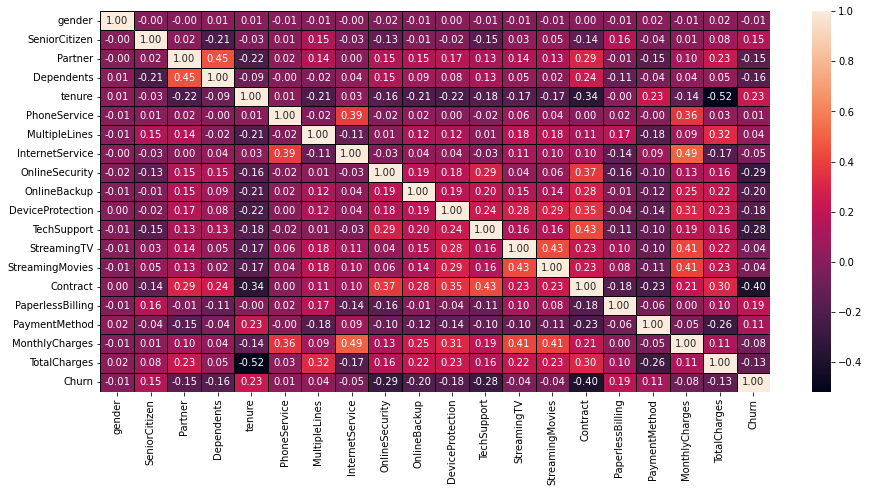

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(), annot=True, linewidths=0.5,linecolor="black", fmt='.2f')

In [41]:
#Descriptive Statistics
df.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.504756,0.162147,0.483033,0.299588,1.234417,0.903166,0.940508,0.872923,0.790004,0.906432,0.904444,0.797104,0.985376,0.992475,0.690473,0.592219,1.574329,1.328979,2.126935,0.265370
std,0.500013,0.368612,0.499748,0.458110,0.806814,0.295752,0.948554,0.737796,0.859848,0.880162,0.879949,0.861551,0.885002,0.885091,0.833755,0.491457,1.068104,0.854741,1.174284,0.441561
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,1.000000,3.000000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,2.000000,3.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,3.000000,4.000000,1.000000


<AxesSubplot:>

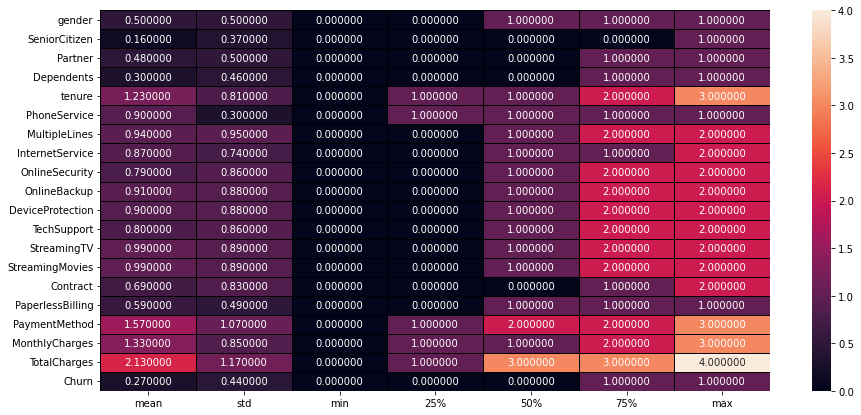

In [42]:
plt.figure(figsize=(15,7))
sns.heatmap(round(df.describe()[1:].transpose(),2), annot=True, linewidths=0.5,linecolor="black", fmt='f')

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   gender            7043 non-null   int32
 1   SeniorCitizen     7043 non-null   int64
 2   Partner           7043 non-null   int32
 3   Dependents        7043 non-null   int32
 4   tenure            7043 non-null   int32
 5   PhoneService      7043 non-null   int32
 6   MultipleLines     7043 non-null   int32
 7   InternetService   7043 non-null   int32
 8   OnlineSecurity    7043 non-null   int32
 9   OnlineBackup      7043 non-null   int32
 10  DeviceProtection  7043 non-null   int32
 11  TechSupport       7043 non-null   int32
 12  StreamingTV       7043 non-null   int32
 13  StreamingMovies   7043 non-null   int32
 14  Contract          7043 non-null   int32
 15  PaperlessBilling  7043 non-null   int32
 16  PaymentMethod     7043 non-null   int32
 17  MonthlyCharges    7043 non-null  

In [44]:
#Checking Data To Remove Skewness
df.iloc[:,:-1].skew()

gender             -0.019031
SeniorCitizen       1.833633
Partner             0.067922
Dependents          0.875199
tenure             -0.432041
PhoneService       -2.727153
MultipleLines       0.118719
InternetService     0.205423
OnlineSecurity      0.416985
OnlineBackup        0.182930
DeviceProtection    0.186847
TechSupport         0.402365
StreamingTV         0.028486
StreamingMovies     0.014657
Contract            0.630959
PaperlessBilling   -0.375396
PaymentMethod      -0.170129
MonthlyCharges      0.546084
TotalCharges       -0.866183
dtype: float64

In [45]:
df.dtypes

gender              int32
SeniorCitizen       int64
Partner             int32
Dependents          int32
tenure              int32
PhoneService        int32
MultipleLines       int32
InternetService     int32
OnlineSecurity      int32
OnlineBackup        int32
DeviceProtection    int32
TechSupport         int32
StreamingTV         int32
StreamingMovies     int32
Contract            int32
PaperlessBilling    int32
PaymentMethod       int32
MonthlyCharges      int32
TotalCharges        int32
Churn               int32
dtype: object

In [46]:
from sklearn.preprocessing import power_transform
x_new=power_transform(df.iloc[:,:-1],method='yeo-johnson')

df.iloc[:,:-1]=pd.DataFrame(x_new,columns=df.iloc[:,:-1].columns)

In [48]:
df.iloc[:,:-1].skew()

gender             -0.019031
SeniorCitizen       1.833633
Partner             0.067922
Dependents          0.875199
tenure             -0.315483
PhoneService       -2.727153
MultipleLines       0.033697
InternetService    -0.072384
OnlineSecurity      0.149362
OnlineBackup       -0.001417
DeviceProtection    0.001051
TechSupport         0.139751
StreamingTV        -0.097211
StreamingMovies    -0.105641
Contract            0.302174
PaperlessBilling   -0.375396
PaymentMethod      -0.207559
MonthlyCharges     -0.013003
TotalCharges       -0.643823
dtype: float64

gender                 AxesSubplot(0.125,0.657941;0.0731132x0.222059)
SeniorCitizen       AxesSubplot(0.212736,0.657941;0.0731132x0.222059)
Partner             AxesSubplot(0.300472,0.657941;0.0731132x0.222059)
Dependents          AxesSubplot(0.388208,0.657941;0.0731132x0.222059)
tenure              AxesSubplot(0.475943,0.657941;0.0731132x0.222059)
PhoneService        AxesSubplot(0.563679,0.657941;0.0731132x0.222059)
MultipleLines       AxesSubplot(0.651415,0.657941;0.0731132x0.222059)
InternetService     AxesSubplot(0.739151,0.657941;0.0731132x0.222059)
OnlineSecurity      AxesSubplot(0.826887,0.657941;0.0731132x0.222059)
OnlineBackup           AxesSubplot(0.125,0.391471;0.0731132x0.222059)
DeviceProtection    AxesSubplot(0.212736,0.391471;0.0731132x0.222059)
TechSupport         AxesSubplot(0.300472,0.391471;0.0731132x0.222059)
StreamingTV         AxesSubplot(0.388208,0.391471;0.0731132x0.222059)
StreamingMovies     AxesSubplot(0.475943,0.391471;0.0731132x0.222059)
Contract            

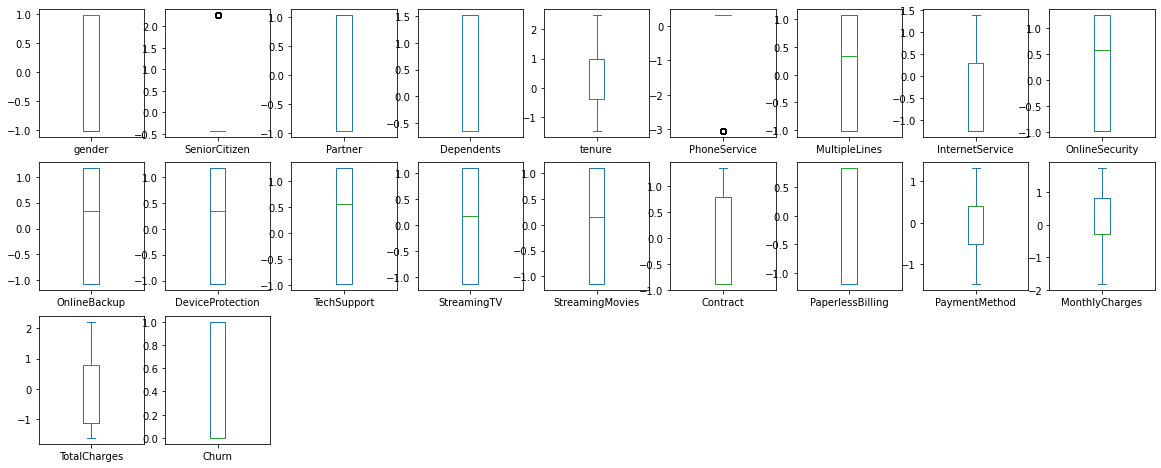

In [49]:
#Outliers Checking
import warnings
warnings.filterwarnings('ignore')
df.plot(kind='box',subplots=True, layout=(3,9), figsize=[20,8])

In [50]:
#IQR Proximity Rule
#Z - Score Technique
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df))
z.shape

(7043, 20)

In [51]:
threshold=3
print(np.where(z>3))

(array([   0,    3,    7,   20,   27,   62,   81,   89,  103,  105,  107,
        114,  116,  129,  131,  133,  168,  180,  185,  187,  206,  211,
        215,  216,  217,  225,  236,  252,  255,  259,  260,  263,  272,
        278,  303,  321,  324,  328,  348,  354,  358,  372,  376,  382,
        387,  398,  424,  431,  435,  452,  465,  481,  488,  495,  498,
        544,  569,  596,  610,  616,  620,  634,  660,  667,  669,  674,
        677,  688,  716,  718,  735,  765,  776,  784,  790,  794,  813,
        829,  843,  847,  859,  866,  873,  875,  877,  884,  893,  917,
        934,  941,  943,  960,  973, 1011, 1018, 1037, 1050, 1051, 1053,
       1072, 1110, 1119, 1122, 1144, 1146, 1150, 1161, 1169, 1182, 1204,
       1221, 1225, 1242, 1255, 1257, 1271, 1278, 1298, 1311, 1326, 1331,
       1333, 1334, 1340, 1349, 1352, 1365, 1379, 1402, 1407, 1416, 1452,
       1479, 1480, 1481, 1500, 1506, 1513, 1519, 1560, 1562, 1581, 1584,
       1614, 1620, 1634, 1637, 1652, 1689, 1692, 1

In [52]:
len(np.where(z>3)[0])

682

In [53]:
df.drop([0,    3,    7,   20,   27,   62,   81,   89,  103,  105,  107,
        114,  116,  129,  131,  133,  168,  180,  185,  187,  206,  211,
        215,  216,  217,  225,  236,  252,  255,  259,  260,  263,  272,
        278,  303,  321,  324,  328,  348,  354,  358,  372,  376,  382,
        387,  398,  424,  431,  435,  452,  465,  481,  488,  495,  498,
        544,  569,  596,  610,  616,  620,  634,  660,  667,  669,  674,
        677,  688,  716,  718,  735,  765,  776,  784,  790,  794,  813,
        829,  843,  847,  859,  866,  873,  875,  877,  884,  893,  917,
        934,  941,  943,  960,  973, 1011, 1018, 1037, 1050, 1051, 1053,
       1072, 1110, 1119, 1122, 1144, 1146, 1150, 1161, 1169, 1182, 1204,
       1221, 1225, 1242, 1255, 1257, 1271, 1278, 1298, 1311, 1326, 1331,
       1333, 1334, 1340, 1349, 1352, 1365, 1379, 1402, 1407, 1416, 1452,
       1479, 1480, 1481, 1500, 1506, 1513, 1519, 1560, 1562, 1581, 1584,
       1614, 1620, 1634, 1637, 1652, 1689, 1692, 1694, 1703, 1722, 1734,
       1789, 1802, 1803, 1819, 1827, 1832, 1845, 1851, 1854, 1862, 1881,
       1889, 1892, 1894, 1906, 1910, 1944, 1959, 1969, 1985, 1989, 1998,
       2002, 2031, 2046, 2050, 2087, 2089, 2090, 2117, 2124, 2127, 2131,
       2188, 2215, 2225, 2226, 2237, 2239, 2290, 2295, 2310, 2340, 2344,
       2348, 2362, 2382, 2383, 2385, 2398, 2399, 2409, 2412, 2413, 2417,
       2420, 2421, 2426, 2427, 2431, 2433, 2465, 2468, 2492, 2533, 2538,
       2541, 2547, 2562, 2608, 2610, 2626, 2637, 2644, 2661, 2662, 2681,
       2696, 2700, 2709, 2712, 2718, 2725, 2728, 2748, 2751, 2752, 2754,
       2761, 2773, 2781, 2804, 2809, 2814, 2841, 2842, 2889, 2898, 2899,
       2903, 2913, 2915, 2916, 2918, 2919, 2929, 2940, 2944, 2962, 2966,
       2972, 2990, 2992, 2994, 2995, 3020, 3028, 3036, 3039, 3042, 3043,
       3060, 3062, 3070, 3073, 3080, 3092, 3096, 3126, 3127, 3133, 3139,
       3150, 3160, 3174, 3177, 3183, 3185, 3190, 3191, 3194, 3213, 3221,
       3223, 3233, 3235, 3243, 3258, 3290, 3292, 3311, 3316, 3318, 3342,
       3354, 3363, 3370, 3414, 3422, 3444, 3454, 3492, 3502, 3505, 3541,
       3542, 3557, 3575, 3583, 3586, 3594, 3613, 3614, 3617, 3620, 3621,
       3652, 3653, 3660, 3677, 3680, 3685, 3690, 3722, 3733, 3738, 3753,
       3756, 3773, 3819, 3860, 3870, 3873, 3877, 3902, 3905, 3926, 3934,
       3940, 3945, 3946, 3955, 3961, 3973, 3976, 3983, 3989, 4008, 4020,
       4024, 4027, 4029, 4040, 4041, 4043, 4048, 4052, 4054, 4055, 4056,
       4071, 4075, 4085, 4099, 4109, 4128, 4130, 4132, 4141, 4149, 4151,
       4162, 4168, 4174, 4178, 4180, 4183, 4200, 4207, 4208, 4233, 4239,
       4251, 4281, 4290, 4309, 4310, 4311, 4338, 4369, 4396, 4400, 4402,
       4409, 4411, 4424, 4432, 4465, 4474, 4481, 4521, 4537, 4557, 4565,
       4603, 4612, 4641, 4653, 4657, 4665, 4670, 4702, 4710, 4726, 4728,
       4729, 4740, 4750, 4765, 4773, 4821, 4828, 4831, 4840, 4845, 4849,
       4854, 4857, 4860, 4882, 4883, 4897, 4898, 4915, 4919, 4924, 4933,
       4949, 4965, 4968, 4970, 4974, 4976, 4981, 4983, 4989, 4992, 4993,
       5002, 5013, 5014, 5017, 5034, 5060, 5062, 5064, 5066, 5073, 5085,
       5091, 5117, 5130, 5144, 5147, 5163, 5176, 5180, 5186, 5204, 5207,
       5210, 5212, 5216, 5249, 5263, 5264, 5284, 5290, 5292, 5296, 5303,
       5314, 5329, 5331, 5338, 5343, 5348, 5356, 5359, 5382, 5387, 5391,
       5392, 5411, 5456, 5489, 5497, 5501, 5505, 5531, 5536, 5546, 5559,
       5565, 5601, 5607, 5631, 5636, 5648, 5665, 5666, 5674, 5682, 5683,
       5690, 5717, 5740, 5761, 5788, 5790, 5796, 5799, 5829, 5833, 5837,
       5841, 5880, 5884, 5889, 5891, 5900, 5911, 5939, 5941, 5942, 5949,
       5950, 5954, 5961, 5967, 5976, 5983, 6001, 6006, 6007, 6020, 6030,
       6031, 6039, 6043, 6059, 6064, 6067, 6074, 6080, 6087, 6093, 6108,
       6129, 6132, 6133, 6145, 6149, 6162, 6174, 6183, 6204, 6209, 6212,
       6218, 6219, 6220, 6235, 6248, 6252, 6253, 6256, 6260, 6263, 6269,
       6285, 6296, 6310, 6319, 6326, 6331, 6367, 6377, 6383, 6392, 6406,
       6415, 6416, 6424, 6425, 6435, 6455, 6457, 6459, 6493, 6494, 6500,
       6503, 6509, 6514, 6515, 6522, 6523, 6530, 6536, 6547, 6553, 6570,
       6573, 6593, 6600, 6607, 6624, 6640, 6653, 6661, 6662, 6665, 6677,
       6679, 6683, 6684, 6691, 6693, 6703, 6727, 6747, 6750, 6752, 6757,
       6777, 6779, 6783, 6791, 6810, 6811, 6813, 6834, 6864, 6881, 6884,
       6891, 6895, 6904, 6905, 6937, 6940, 6941, 6943, 6946, 6949, 6964,
       6966, 6979, 6980, 6984, 6985, 6999, 7003, 7007, 7029, 7036, 7040],axis=0)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1,0.990532,-0.439916,-0.966622,-0.654012,-1.475255,0.327438,-1.015015,-1.252568,1.258702,-1.078800,1.163539,-0.983227,-1.151526,-1.158239,0.790424,-1.205113,1.318899,-0.285713,0.780284,0
2,0.990532,-0.439916,-0.966622,-0.654012,0.971864,0.327438,-1.015015,-1.252568,1.258702,1.161936,-1.077012,-0.983227,-1.151526,-1.158239,-0.888524,0.829798,1.318899,-0.285713,-1.638644,1
4,-1.009559,-0.439916,-0.966622,-0.654012,0.971864,0.327438,-1.015015,0.290254,-0.977199,-1.078800,-1.077012,-0.983227,-1.151526,-1.158239,-0.888524,0.829798,0.409685,-0.285713,-1.638644,1
5,-1.009559,-0.439916,-0.966622,-0.654012,0.971864,0.327438,1.081357,0.290254,-0.977199,-1.078800,1.163539,-0.983227,1.099560,1.094066,-0.888524,0.829798,0.409685,-0.285713,-1.151770,1
6,0.990532,-0.439916,-0.966622,1.529024,0.971864,0.327438,1.081357,0.290254,-0.977199,1.161936,-1.077012,-0.983227,1.099560,-1.158239,-0.888524,0.829798,-0.522116,-0.285713,0.780284,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,-1.009559,-0.439916,-0.966622,-0.654012,-0.370804,0.327438,-1.015015,1.398323,0.574655,0.333547,0.337655,0.559883,0.169907,0.155116,1.344386,0.829798,-1.489837,0.833486,0.780284,0
7038,0.990532,-0.439916,1.034530,1.529024,0.971864,0.327438,1.081357,-1.252568,1.258702,-1.078800,1.163539,1.252625,1.099560,1.094066,0.790424,0.829798,1.318899,-0.285713,0.780284,0
7039,-1.009559,-0.439916,1.034530,1.529024,-0.370804,0.327438,1.081357,0.290254,-0.977199,1.161936,1.163539,-0.983227,1.099560,1.094066,0.790424,0.829798,-0.522116,1.739447,0.780284,0
7041,0.990532,2.273159,1.034530,-0.654012,0.971864,0.327438,1.081357,0.290254,-0.977199,-1.078800,-1.077012,-0.983227,-1.151526,-1.158239,-0.888524,0.829798,1.318899,-0.285713,-1.638644,1


In [54]:
df=df[(z<3).all(axis=1)]

In [56]:
#Feature Engineering ( Variantion Inflation Factor )
from statsmodels.stats.outliers_influence import variance_inflation_factor
df.corr()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,-0.006666,-0.003095,0.015081,0.008308,NaN,-0.007232,0.000691,-0.014384,-0.008126,-0.001984,-0.007707,-0.004934,-0.002121,0.000109,-0.018561,0.023190,-0.010265,0.015454,-0.011212
SeniorCitizen,-0.006666,1.000000,0.014985,-0.212450,-0.035098,NaN,0.153645,-0.008703,-0.154976,-0.045127,-0.048159,-0.174597,0.011788,0.031070,-0.139769,0.155571,-0.041355,0.013137,0.096257,0.148802
Partner,-0.003095,0.014985,1.000000,0.454535,-0.233939,NaN,0.150238,-0.007334,0.144435,0.152780,0.165039,0.126526,0.133740,0.128186,0.298984,-0.009456,-0.150974,0.096256,0.245409,-0.154692
Dependents,0.015081,-0.212450,0.454535,1.000000,-0.096641,NaN,-0.026347,0.030506,0.168234,0.108525,0.101274,0.152426,0.062273,0.036932,0.242041,-0.106037,-0.040962,0.041412,0.048169,-0.159481
tenure,0.008308,-0.035098,-0.233939,-0.096641,1.000000,NaN,-0.230075,0.023828,-0.157239,-0.219239,-0.222297,-0.172120,-0.176452,-0.186574,-0.397759,-0.001127,0.235398,-0.166626,-0.530103,0.241171
PhoneService,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MultipleLines,-0.007232,0.153645,0.150238,-0.026347,-0.230075,NaN,1.000000,-0.073475,-0.044298,0.089340,0.093837,-0.038913,0.164323,0.171503,0.107843,0.174347,-0.183989,0.088078,0.358404,0.040207
InternetService,0.000691,-0.008703,-0.007334,0.030506,0.023828,NaN,-0.073475,1.000000,0.083612,0.117969,0.139692,0.086525,0.177219,0.168834,0.070089,-0.123644,0.087344,0.446934,-0.193455,-0.020619
OnlineSecurity,-0.014384,-0.154976,0.144435,0.168234,-0.157239,NaN,-0.044298,0.083612,1.000000,0.238791,0.216528,0.344473,0.073036,0.086260,0.400996,-0.213142,-0.061845,0.208507,0.094648,-0.323256
OnlineBackup,-0.008126,-0.045127,0.152780,0.108525,-0.219239,NaN,0.089340,0.117969,0.238791,1.000000,0.221437,0.249268,0.165407,0.152673,0.320899,-0.063468,-0.108243,0.302094,0.192440,-0.230586


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5]),
 [Text(0, 0.5, 'gender'),
  Text(0, 1.5, 'SeniorCitizen'),
  Text(0, 2.5, 'Partner'),
  Text(0, 3.5, 'Dependents'),
  Text(0, 4.5, 'tenure'),
  Text(0, 5.5, 'PhoneService'),
  Text(0, 6.5, 'MultipleLines'),
  Text(0, 7.5, 'InternetService'),
  Text(0, 8.5, 'OnlineSecurity'),
  Text(0, 9.5, 'OnlineBackup'),
  Text(0, 10.5, 'DeviceProtection'),
  Text(0, 11.5, 'TechSupport'),
  Text(0, 12.5, 'StreamingTV'),
  Text(0, 13.5, 'StreamingMovies'),
  Text(0, 14.5, 'Contract'),
  Text(0, 15.5, 'PaperlessBilling'),
  Text(0, 16.5, 'PaymentMethod'),
  Text(0, 17.5, 'MonthlyCharges'),
  Text(0, 18.5, 'TotalCharges'),
  Text(0, 19.5, 'Churn')])

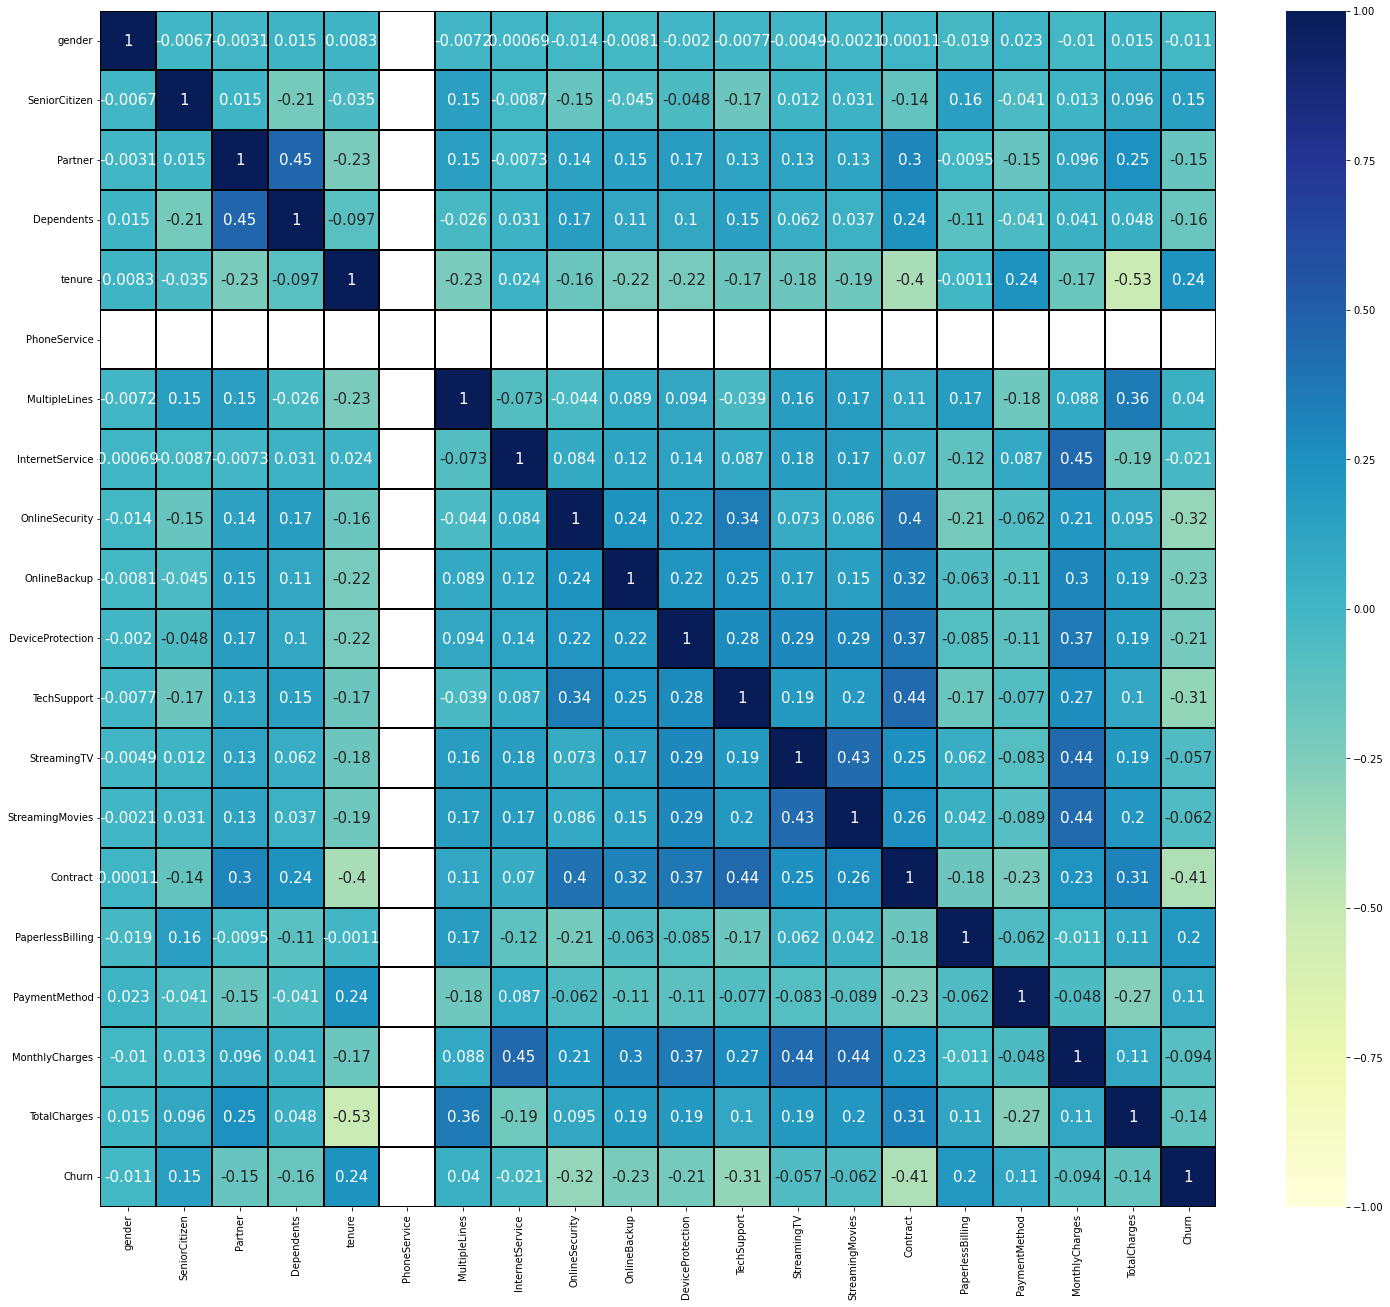

In [57]:
plt.figure(figsize=(25,22))
sns.heatmap(df.corr(),linewidths=.1,vmin=-1, vmax=1, fmt='.2g', annot = True, linecolor="black",annot_kws={'size':15},cmap="YlGnBu")
plt.yticks(rotation=0)

In [58]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [59]:
x=df.drop('Churn',axis=1)
y=df['Churn']

In [60]:
x

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
1,0.990532,-0.439916,-0.966622,-0.654012,-1.475255,0.327438,-1.015015,-1.252568,1.258702,-1.078800,1.163539,-0.983227,-1.151526,-1.158239,0.790424,-1.205113,1.318899,-0.285713,0.780284
2,0.990532,-0.439916,-0.966622,-0.654012,0.971864,0.327438,-1.015015,-1.252568,1.258702,1.161936,-1.077012,-0.983227,-1.151526,-1.158239,-0.888524,0.829798,1.318899,-0.285713,-1.638644
4,-1.009559,-0.439916,-0.966622,-0.654012,0.971864,0.327438,-1.015015,0.290254,-0.977199,-1.078800,-1.077012,-0.983227,-1.151526,-1.158239,-0.888524,0.829798,0.409685,-0.285713,-1.638644
5,-1.009559,-0.439916,-0.966622,-0.654012,0.971864,0.327438,1.081357,0.290254,-0.977199,-1.078800,1.163539,-0.983227,1.099560,1.094066,-0.888524,0.829798,0.409685,-0.285713,-1.151770
6,0.990532,-0.439916,-0.966622,1.529024,0.971864,0.327438,1.081357,0.290254,-0.977199,1.161936,-1.077012,-0.983227,1.099560,-1.158239,-0.888524,0.829798,-0.522116,-0.285713,0.780284
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,-1.009559,-0.439916,-0.966622,-0.654012,-0.370804,0.327438,-1.015015,1.398323,0.574655,0.333547,0.337655,0.559883,0.169907,0.155116,1.344386,0.829798,-1.489837,0.833486,0.780284
7038,0.990532,-0.439916,1.034530,1.529024,0.971864,0.327438,1.081357,-1.252568,1.258702,-1.078800,1.163539,1.252625,1.099560,1.094066,0.790424,0.829798,1.318899,-0.285713,0.780284
7039,-1.009559,-0.439916,1.034530,1.529024,-0.370804,0.327438,1.081357,0.290254,-0.977199,1.161936,1.163539,-0.983227,1.099560,1.094066,0.790424,0.829798,-0.522116,1.739447,0.780284
7041,0.990532,2.273159,1.034530,-0.654012,0.971864,0.327438,1.081357,0.290254,-0.977199,-1.078800,-1.077012,-0.983227,-1.151526,-1.158239,-0.888524,0.829798,1.318899,-0.285713,-1.638644


In [61]:
y

1       0
2       1
4       1
5       1
6       0
       ..
7037    0
7038    0
7039    0
7041    1
7042    0
Name: Churn, Length: 6361, dtype: int32

In [62]:
def vif_calc():
  vif=pd.DataFrame()
  vif["VIF Factor"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
  vif["features"]=x.columns
  print(vif)

In [63]:
vif_calc()

    VIF Factor          features
0     1.002707            gender
1     1.139970     SeniorCitizen
2     1.424643           Partner
3     1.375325        Dependents
4     1.547979            tenure
5     1.037888      PhoneService
6     1.235414     MultipleLines
7     1.378392   InternetService
8     1.319438    OnlineSecurity
9     1.226909      OnlineBackup
10    1.333121  DeviceProtection
11    1.393843       TechSupport
12    1.429039       StreamingTV
13    1.429866   StreamingMovies
14    1.840667          Contract
15    1.150978  PaperlessBilling
16    1.133908     PaymentMethod
17    1.867723    MonthlyCharges
18    1.710181      TotalCharges


In [64]:
# Dropping the irrelevant columns..

x.drop(columns=["TotalCharges"], axis=1, inplace=True)

In [65]:
vif_calc()

    VIF Factor          features
0     1.001647            gender
1     1.136518     SeniorCitizen
2     1.413357           Partner
3     1.373019        Dependents
4     1.304635            tenure
5     1.035503      PhoneService
6     1.181311     MultipleLines
7     1.311666   InternetService
8     1.319300    OnlineSecurity
9     1.222216      OnlineBackup
10    1.331587  DeviceProtection
11    1.393140       TechSupport
12    1.425550       StreamingTV
13    1.425117   StreamingMovies
14    1.827292          Contract
15    1.145720  PaperlessBilling
16    1.124043     PaymentMethod
17    1.866991    MonthlyCharges


In [66]:
#Scaling the Data
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=pd.DataFrame(sc.fit_transform(x), columns=x.columns)
x

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges
0,0.992638,-0.441591,-0.972245,-0.653600,-1.480851,0.0,-0.936163,-1.445146,1.268202,-1.107965,1.171124,-0.999030,-1.192285,-1.195085,0.789726,-1.211765,1.319450,-0.457306
1,0.992638,-0.441591,-0.972245,-0.653600,0.971845,0.0,-0.936163,-1.445146,1.268202,1.162691,-1.099729,-0.999030,-1.192285,-1.195085,-0.888750,0.825243,1.319450,-0.457306
2,-1.007416,-0.441591,-0.972245,-0.653600,0.971845,0.0,-0.936163,0.162513,-0.994094,-1.107965,-1.099729,-0.999030,-1.192285,-1.195085,-0.888750,0.825243,0.410813,-0.457306
3,-1.007416,-0.441591,-0.972245,-0.653600,0.971845,0.0,1.068190,0.162513,-0.994094,-1.107965,1.171124,-0.999030,1.093610,1.092013,-0.888750,0.825243,0.410813,-0.457306
4,0.992638,-0.441591,-0.972245,1.529987,0.971845,0.0,1.068190,0.162513,-0.994094,1.162691,-1.099729,-0.999030,1.093610,-1.195085,-0.888750,0.825243,-0.520395,-0.457306
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6356,-1.007416,-0.441591,-0.972245,-0.653600,-0.373883,0.0,-0.936163,1.317148,0.576080,0.323240,0.334071,0.562789,0.149581,0.138558,1.343533,0.825243,-1.487502,0.762527
6357,0.992638,-0.441591,1.028548,1.529987,0.971845,0.0,1.068190,-1.445146,1.268202,-1.107965,1.171124,1.263929,1.093610,1.092013,0.789726,0.825243,1.319450,-0.457306
6358,-1.007416,-0.441591,1.028548,1.529987,-0.373883,0.0,1.068190,0.162513,-0.994094,1.162691,1.171124,-0.999030,1.093610,1.092013,0.789726,0.825243,-0.520395,1.749950
6359,0.992638,2.264538,1.028548,-0.653600,0.971845,0.0,1.068190,0.162513,-0.994094,-1.107965,-1.099729,-0.999030,-1.192285,-1.195085,-0.888750,0.825243,1.319450,-0.457306


MODELLING FOR CHURN

Building CLASSIFICATION Model As Target Column's Has only Two Outputs

0    4662
1    1699
Name: Churn, dtype: int64


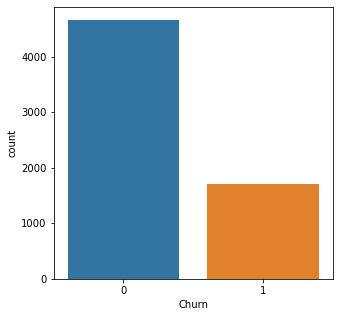

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt

print(df['Churn'].value_counts())  
plt.figure(figsize=(5,5))
sns.countplot(df['Churn'])
plt.show()

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import GradientBoostingClassifier, BaggingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

maxAccu=0
maxRS=0

for i in range(1,200):
    x_train,x_test, y_train, y_test=train_test_split(x,y,test_size=.30, random_state=i)
    rfc=RandomForestClassifier()
    rfc.fit(x_train,y_train)
    pred=rfc.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu*100," on Random_state ",maxRS)

Best accuracy is  78.99423782084861  on Random_state  11


In [70]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=maxRS)

# Logistic Regression

In [71]:
# Checking Accuracy for Logistic Regression
log = LogisticRegression()
log.fit(x_train,y_train)

#Prediction
predlog = log.predict(x_test)

print(accuracy_score(y_test, predlog)*100)
print(confusion_matrix(y_test, predlog))
print(classification_report(y_test,predlog))

79.93713986380304
[[1283  144]
 [ 239  243]]
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1427
           1       0.63      0.50      0.56       482

    accuracy                           0.80      1909
   macro avg       0.74      0.70      0.71      1909
weighted avg       0.79      0.80      0.79      1909



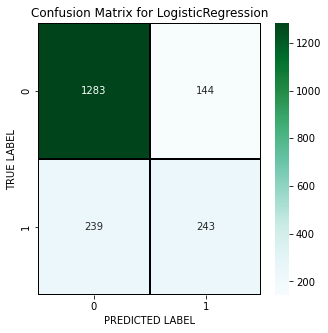

In [72]:
# Plotting Confusion_Matrix
cm = confusion_matrix(y_test,predlog)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for LogisticRegression')
plt.show()

# Random Forest Classifier

In [73]:
# Checking accuracy for Random Forest Classifier
rf = RandomForestClassifier()
rf.fit(x_train,y_train)

# Prediction
predrf = rf.predict(x_test)

print(accuracy_score(y_test, predrf)*100)
print(confusion_matrix(y_test, predrf))
print(classification_report(y_test,predrf))

78.62755369303301
[[1255  172]
 [ 236  246]]
              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1427
           1       0.59      0.51      0.55       482

    accuracy                           0.79      1909
   macro avg       0.72      0.69      0.70      1909
weighted avg       0.78      0.79      0.78      1909



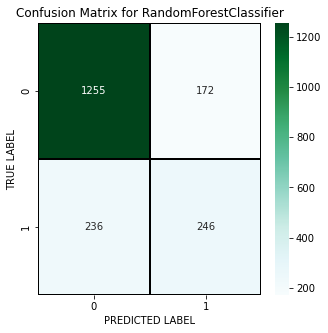

In [74]:
# Lets plot confusion matrix for RandomForestClassifier
cm = confusion_matrix(y_test,predrf)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm, annot = True,linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for RandomForestClassifier')
plt.show()

# Decission Tree Classifier


In [75]:
# Checking Accuracy for Decision Tree Classifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)

#Prediction
preddtc = dtc.predict(x_test)

print(accuracy_score(y_test, preddtc)*100)
print(confusion_matrix(y_test, preddtc))
print(classification_report(y_test,preddtc))

73.38920900995285
[[1175  252]
 [ 256  226]]
              precision    recall  f1-score   support

           0       0.82      0.82      0.82      1427
           1       0.47      0.47      0.47       482

    accuracy                           0.73      1909
   macro avg       0.65      0.65      0.65      1909
weighted avg       0.73      0.73      0.73      1909



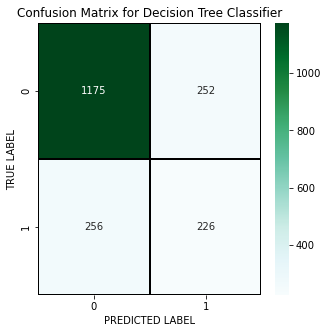

In [76]:
# Lets plot confusion matrix for DTC
cm = confusion_matrix(y_test,preddtc)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.show()

# Support Vector Machine Classifier


In [77]:
# Checking accuracy for Support Vector Machine Classifier
svc = SVC()
svc.fit(x_train,y_train)

# Prediction
predsvc = svc.predict(x_test)

print(accuracy_score(y_test, predsvc)*100)
print(confusion_matrix(y_test, predsvc))
print(classification_report(y_test,predsvc))

80.09429020429543
[[1296  131]
 [ 249  233]]
              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1427
           1       0.64      0.48      0.55       482

    accuracy                           0.80      1909
   macro avg       0.74      0.70      0.71      1909
weighted avg       0.79      0.80      0.79      1909



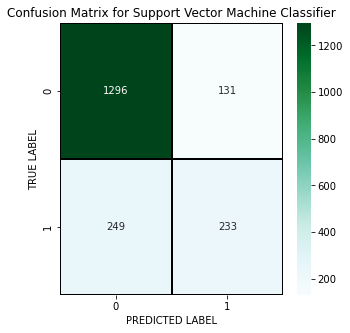

In [78]:
# Lets plot confusion matrix for Support Vector Machine Classifier
cm = confusion_matrix(y_test,predsvc)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Support Vector Machine Classifier')
plt.show()

# Gradient Boosting Classifier


In [79]:
# Checking accuracy for Gradient Boosting Classifier
GB = GradientBoostingClassifier()
GB.fit(x_train,y_train)

# Prediction
predGB = GB.predict(x_test)

print(accuracy_score(y_test, predGB)*100)
print(confusion_matrix(y_test, predGB))
print(classification_report(y_test,predGB))

80.51335777894185
[[1273  154]
 [ 218  264]]
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1427
           1       0.63      0.55      0.59       482

    accuracy                           0.81      1909
   macro avg       0.74      0.72      0.73      1909
weighted avg       0.80      0.81      0.80      1909



Text(0.5, 1.0, 'Confusion Matrix for Gradient Boosting Classifier')

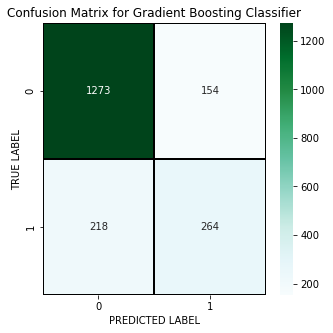

In [81]:
# Lets plot confusion matrix for Gradient Boosting Classifier
cm = confusion_matrix(y_test,predGB)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Gradient Boosting Classifier')

# Cross Validation Score


In [82]:
#cv score for Logistic Regression
print(cross_val_score(log,x,y,cv=5).mean()*100)

# cv score for Decision Tree Classifier
print(cross_val_score(dtc,x,y,cv=5).mean()*100)

# cv score for Random Forest Classifier
print(cross_val_score(rf,x,y,cv=5).mean()*100)

# cv score for Support Vector  Classifier
print(cross_val_score(svc,x,y,cv=5).mean()*100)

# cv score for Gradient Boosting Classifier
print(cross_val_score(GB,x,y,cv=5).mean()*100)

78.88699501499454
72.34671972807266
76.84305631722223
79.04422771939707
79.46866956182346


It is clear from the above that Random Forest Classifier is working the best with respect to Cross validation score as well which is minimum in the case..

So we move forward with Random Forest Classifier Model

# HyperParameter Tuning for the model with best score


In [83]:
#Random Forest Classifier

parameters = {'criterion':['gini'],
             'max_features':['auto'],
             'n_estimators':[0,200],
             'max_depth':[2,3,4,5,6,8]}

In [84]:
GCV=GridSearchCV(RandomForestClassifier(),parameters,cv=5)

In [85]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini'], 'max_depth': [2, 3, 4, 5, 6, 8],
                         'max_features': ['auto'], 'n_estimators': [0, 200]})

In [86]:
GCV.best_params_

{'criterion': 'gini',
 'max_depth': 6,
 'max_features': 'auto',
 'n_estimators': 200}

In [87]:
Churne =RandomForestClassifier (criterion='gini', max_depth=8, max_features='auto', n_estimators=200)
Churne.fit(x_train, y_train)
pred = Churne.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

80.56574122577265


# Plotting ROC and compare AUC for the final model

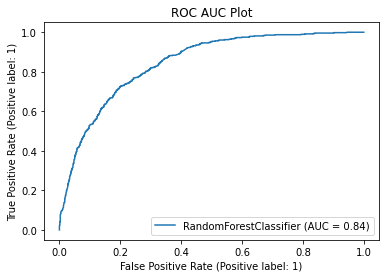

In [88]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(Churne,x_test,y_test)
plt.title("ROC AUC Plot")
plt.show()

# The accuracy score for Income is 84 %

In [ ]:
#completed